# Import Required Libraries
Import the necessary libraries, including libraries for sound file processing such as librosa.

In [29]:
import numpy as np
import librosa
import pandas as pd
import soundfile as sf

# Load Sound File
Load a sound file using the appropriate function from the sound processing library.

In [30]:
# Load Sound File
filename = 'assets/test2.ogg'  # replace with your file path
data, sampling_rate = librosa.load(filename)

# Extract Sound Data
Extract the sound data from the loaded sound file. This could be in the form of a waveform or a spectrogram.

In [31]:
dd = pd.DataFrame(data)
dd.describe()

0
count  1.269610e+06
mean  -7.519414e-05
std    1.672896e-01
min   -1.002231e+00
25%   -5.160228e-02
50%   -4.944773e-05
75%    2.400856e-02
max    1.054948e+00

In [32]:
# Extract Sound Data
# Get the maximum sound from the data
max_sound = np.max(data)
min_sound = np.min(data)
max_sound = max(max_sound, abs(min_sound))

# Print the maximum sound
print(f"The maximum sound in the audio file is: {max_sound}")

less_data = [max(data[i:i+int(sampling_rate/4)])
                 for i in range(0, len(data), int(sampling_rate/4))]


# Get the minimum sound from the data it will be the closest to zero
closest_to_zero = np.abs(less_data).min()
print(f"The closest sound to zero in the audio file is: {closest_to_zero}")


# get the average sound from the data
average_sound = np.mean(less_data)
print(f"The average sound in the audio file is: {average_sound}")

# get the standard deviation of the sound
std_dev = np.std(less_data)
print(f"The standard deviation of the sound in the audio file is: {std_dev}")

# get the variance of the sound
variance = np.var(less_data)
print(f"The variance of the sound in the audio file is: {variance}")


The maximum sound in the audio file is: 1.0549484491348267
The closest sound to zero in the audio file is: 0.0
The average sound in the audio file is: 0.6019294857978821
The standard deviation of the sound in the audio file is: 0.37615591287612915
The variance of the sound in the audio file is: 0.14149326086044312


# play the sound

In [33]:
# play the sound 
import IPython.display as ipd
ipd.display(ipd.Audio(data, rate=sampling_rate, autoplay=True))



# plot the sound

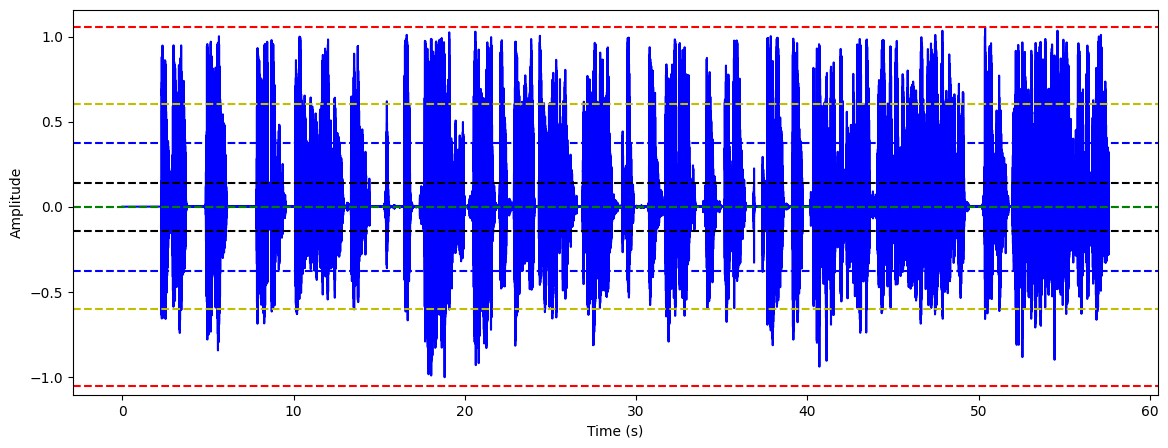

In [34]:

# Plot the Sound Data
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.plot(np.arange(len(data)) / sampling_rate, data, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# add line to show the maximum sound
plt.axhline(y=max_sound, color='r', linestyle='--')
plt.axhline(y=-max_sound, color='r', linestyle='--')

# add line to show the minimum sound
plt.axhline(y=closest_to_zero, color='g', linestyle='--')
plt.axhline(y=-closest_to_zero, color='g', linestyle='--')

# add line to show the average sound
plt.axhline(y=average_sound, color='y', linestyle='--')
plt.axhline(y=-average_sound, color='y', linestyle='--')

# add line to show the standard deviation
plt.axhline(y=std_dev, color='b', linestyle='--')
plt.axhline(y=-std_dev, color='b', linestyle='--')

# add line to show the variance
plt.axhline(y=variance, color='black', linestyle='--')
plt.axhline(y=-variance, color='black', linestyle='--')

plt.show()


# speed up the sound

In [35]:
# back up the data before any changes
cp = data.copy()
data = cp.copy()

In [36]:
new_data = []
for i in range(0, len(data), sampling_rate):
    if np.max(abs(data[i:i+int(sampling_rate/2)])) < std_dev-0.1:
        new_data.append(data[i:i+int(sampling_rate/2):7])
        
    else:
        new_data.append(data[i:i+sampling_rate])
    

new_data = np.concatenate(new_data)

# play the sound
ipd.display(ipd.Audio(new_data, rate=sampling_rate, autoplay=True))


In [37]:
# save the sound data
sf.write(f'{filename.split(".")[0]}_cut.wav', new_data, sampling_rate)